In [4]:
# IMPORTING LIBRARIES

from keras.models import load_model
import cv2
import numpy as np

In [5]:
# LOADING DATA AND CASCADE CLASSIFIER 

model = load_model('model-007.model')
face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
source=cv2.VideoCapture(0)
labels_dict={1:'MASK',0:'NO MASK'}
color_dict={1:(0,255,0),0:(0,0,255)}

In [6]:
# READING FRAME BY FRAME FROM VIDEO OR CAMERA 
# DRAWING RECTANGLES AFTER CONVERTING IMAGE TO GRAYSCLAE AND RESIZING IT
# ADDING TEXT ACCORDING TO LABEL WHETHER IT IS 0 OR 1
# SHOWING EACH FRAME AND WAITING FOR ESCAPE KEY TO TERMINATE

while(True):
    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  
    for x,y,w,h in faces:
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)
        label=np.argmax(result,axis=1)[0]
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    if(key==27):
        break
        
        
cv2.destroyAllWindows()
source.release()

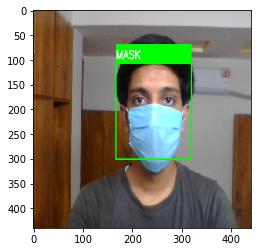

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
withMask = image.load_img('withMask.png',target_size=(440,440))
plt.imshow(withMask)

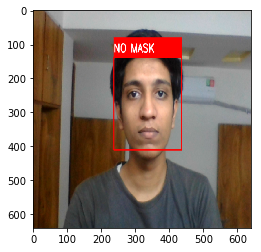

In [17]:
withoutMask = image.load_img('withoutMask.png',target_size=(640,640))
plt.imshow(withoutMask)